# Perkenalan

**Anggota Kelompok**
1. Fachriansyah Muhammad Haikal (PYTN-KS14-010)
2. Fakhrurrozi (PYTN-KS14-018)
3. Safira Alya Fafaza (PYTN-KS14-017)

**Latar Belakang**

Seiring berjalannya waktu pertumbuhan penduduk di dunia semakin meningkat begitu pula pertumbuhan penduduk di kota Boston, New York. Hal ini juga menyebabkan peningkatan pada kebutuhan masyarakat di kota Boston guna memenuhi kebutuhan hidup, salah satunya adalah pemenuhan kebutuhan transportasi publik yang terkenal di Boston yaitu Uber dan Lyft. Uber dan Lyft adalah dua perusahaan layanan transportasi berbasis aplikasi yang menyediakan layanan ride-sharing atau car-sharing. Mereka memungkinkan pengguna untuk memesan perjalanan menggunakan aplikasi di ponsel mereka, di mana pengemudi yang terdaftar dengan platform tersebut akan menjemput mereka dan mengantarkan ke tujuan yang diinginkan.

Pada tahun 2015 Kota Boston memperkenalkan dataset mengenai Uber dan Lyft sebagai bagian dari program "Digital Bridge" yang bertujuan untuk meningkatkan transportasi umum dan mendorong penggunaan teknologi dalam sistem transportasi perkotaan. Tujuan utama dari diperkenalkannya dataset ini adalah untuk memberikan akses terbuka kepada para peneliti, pengembang, dan masyarakat umum untuk menganalisis data perjalanan ride-sharing dan menghasilkan wawasan yang berharga. Sehingga, untuk membantu masyarakat Kota Boston memilih transportasi publik yang menyediakan layanan ride-sharing atau car-sharing yang lebih terjangkau maka diperlukan adanya "Sistem Prediksi Harga Transportasi Publik yang Menyediakan Layanan Ride-Sharing atau Car-Sharing (Uber dan Lyft) di Kota Boston dengan Menggunakan Model Linear Regression".

**Dataset**

Dataset yang digunakan dalam projek ini adalah *Uber and Lyft Dataset Boston* yang berisi data perjalanan transportasi publik yang menyediakan layanan ride-sharing atau car-sharing yaitu Uber dan Lyft di kota Boston. Dataset ini memiliki 693071 dengan 57 atribut. Namun pada projek ini atribut yang akan digunakan dan diperlukan untuk membuat sistem prediksi sebanyak 11 antara lain sebagai berikut :
1. hour = waktu pemesanan tranportasi
2. day = tanggal pemesanan transportasi
3. month = bulan pemesanan transportasi
4. source = titik jemput
5. destination = titik antar
6. cab_type = jenis perusahaan transportasi
7. name = tipe layanan transportasi
8. price = harga layanan
9. distance = jarak tempuh (destination-source)
10. surge_pricing = mekanisme kenaikan harga yang dipicu oleh tingginya permintaan transportasi di suatu daerah 
11. short_summary = cuaca

**Objektif**
* menemukan faktor-faktor yang mempengaruhi harga/tarif pada layanan Uber dan Lyft
* menemukan akurasi prediksi dengan menggunakan metode Linear Regression harga/tarif pada layanan Uber dan Lyft
* memberikan wawasan yang dapat bermanfaat bagi masyarakat di kota Boston mengenai layanan Uber dan Lyft

# Import Pustaka

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
# jumlah data dan kolom
df.shape

(693071, 57)

Dapat diketahui bahwa terdapat 693071 data dengan 57 kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# data unik dari setiap kolom
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

id
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
datetime
['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']
timezone
['America/New_York']
source
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
destination
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
cab_type
['Lyft' 'Uber']
product_id
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-

# Data Cleansing

## Hapus Kolom yang Tidak Digunakan

In [6]:
# mengambil atribut yang akan digunakan
use_cols = [
    'hour',
    'day',
    'month',
    'cab_type',
    'name',
    'price',
    'distance',
    'surge_multiplier',
    'short_summary'
]

df = df[use_cols]
df.head()

,hour,day,month,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


## Mengganti Nama Atribut

In [7]:
df_used = df.copy()

In [8]:
df_used.rename(columns={
    'hour': 'time',
    'cab_type': 'company',
    'name': 'service_type',
    'surge_multiplier': 'surge_pricing',
    'short_summary': 'weather'
}, inplace=True)

In [9]:
df_used.head()

,time,day,month,company,service_type,price,distance,surge_pricing,weather
0,9,16,12,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,27,11,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,28,11,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,30,11,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,29,11,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


In [10]:
# mengubah posisi atribut price
df_used = df_used.loc[:, ['time', 'day', 'month', 'company', 'service_type', 'distance', 'surge_pricing', 'weather', 'price']]
df_used.head()

,time,day,month,company,service_type,distance,surge_pricing,weather,price
0,9,16,12,Lyft,Shared,0.44,1.0,Mostly Cloudy,5.0
1,2,27,11,Lyft,Lux,0.44,1.0,Rain,11.0
2,1,28,11,Lyft,Lyft,0.44,1.0,Clear,7.0
3,4,30,11,Lyft,Lux Black XL,0.44,1.0,Clear,26.0
4,3,29,11,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,9.0


In [11]:
df_used.shape

(693071, 9)

## Cek Data Kosong

In [12]:
df_used.isna().sum()

time                 0
day                  0
month                0
company              0
service_type         0
distance             0
surge_pricing        0
weather              0
price            55095
dtype: int64

In [13]:
# menghapus data kosong
df_used = df_used.dropna()

In [14]:
df_used.isna().sum()

time             0
day              0
month            0
company          0
service_type     0
distance         0
surge_pricing    0
weather          0
price            0
dtype: int64

In [15]:
df_used.shape

(637976, 9)

## Cek One Unique Value

In [16]:
for column in df_used.columns:
    print(column, df_used[column].nunique())

time 24
day 17
month 2
company 2
service_type 12
distance 549
surge_pricing 7
weather 9
price 147


Dapat diketahui bahwa atribut yang ada tidak ditemukan one unique value sehingga tidak perlu ada yang dihapus.

## Cek Data Duplikat

In [17]:
df_used.duplicated().sum()

88663

Terdapat 88663 data duplikat maka diperlukan adanya penghapusan data yang duplikat.

In [18]:
df_used.drop_duplicates(inplace=True)
df_used.duplicated().sum()

0

# Explorasi Data

In [19]:
df_used.shape

(549313, 9)

## Categorical Features

In [20]:
categorical_features = [feature for feature in df_used.columns if (
    df_used[feature].dtypes == "O")]
categorical_features

['company', 'service_type', 'weather']

In [21]:
for feature in categorical_features:
    print(
        f"Feature {feature} memiliki unique value {(df_used[feature].nunique())}")

Feature company memiliki unique value 2
Feature service_type memiliki unique value 12
Feature weather memiliki unique value 9


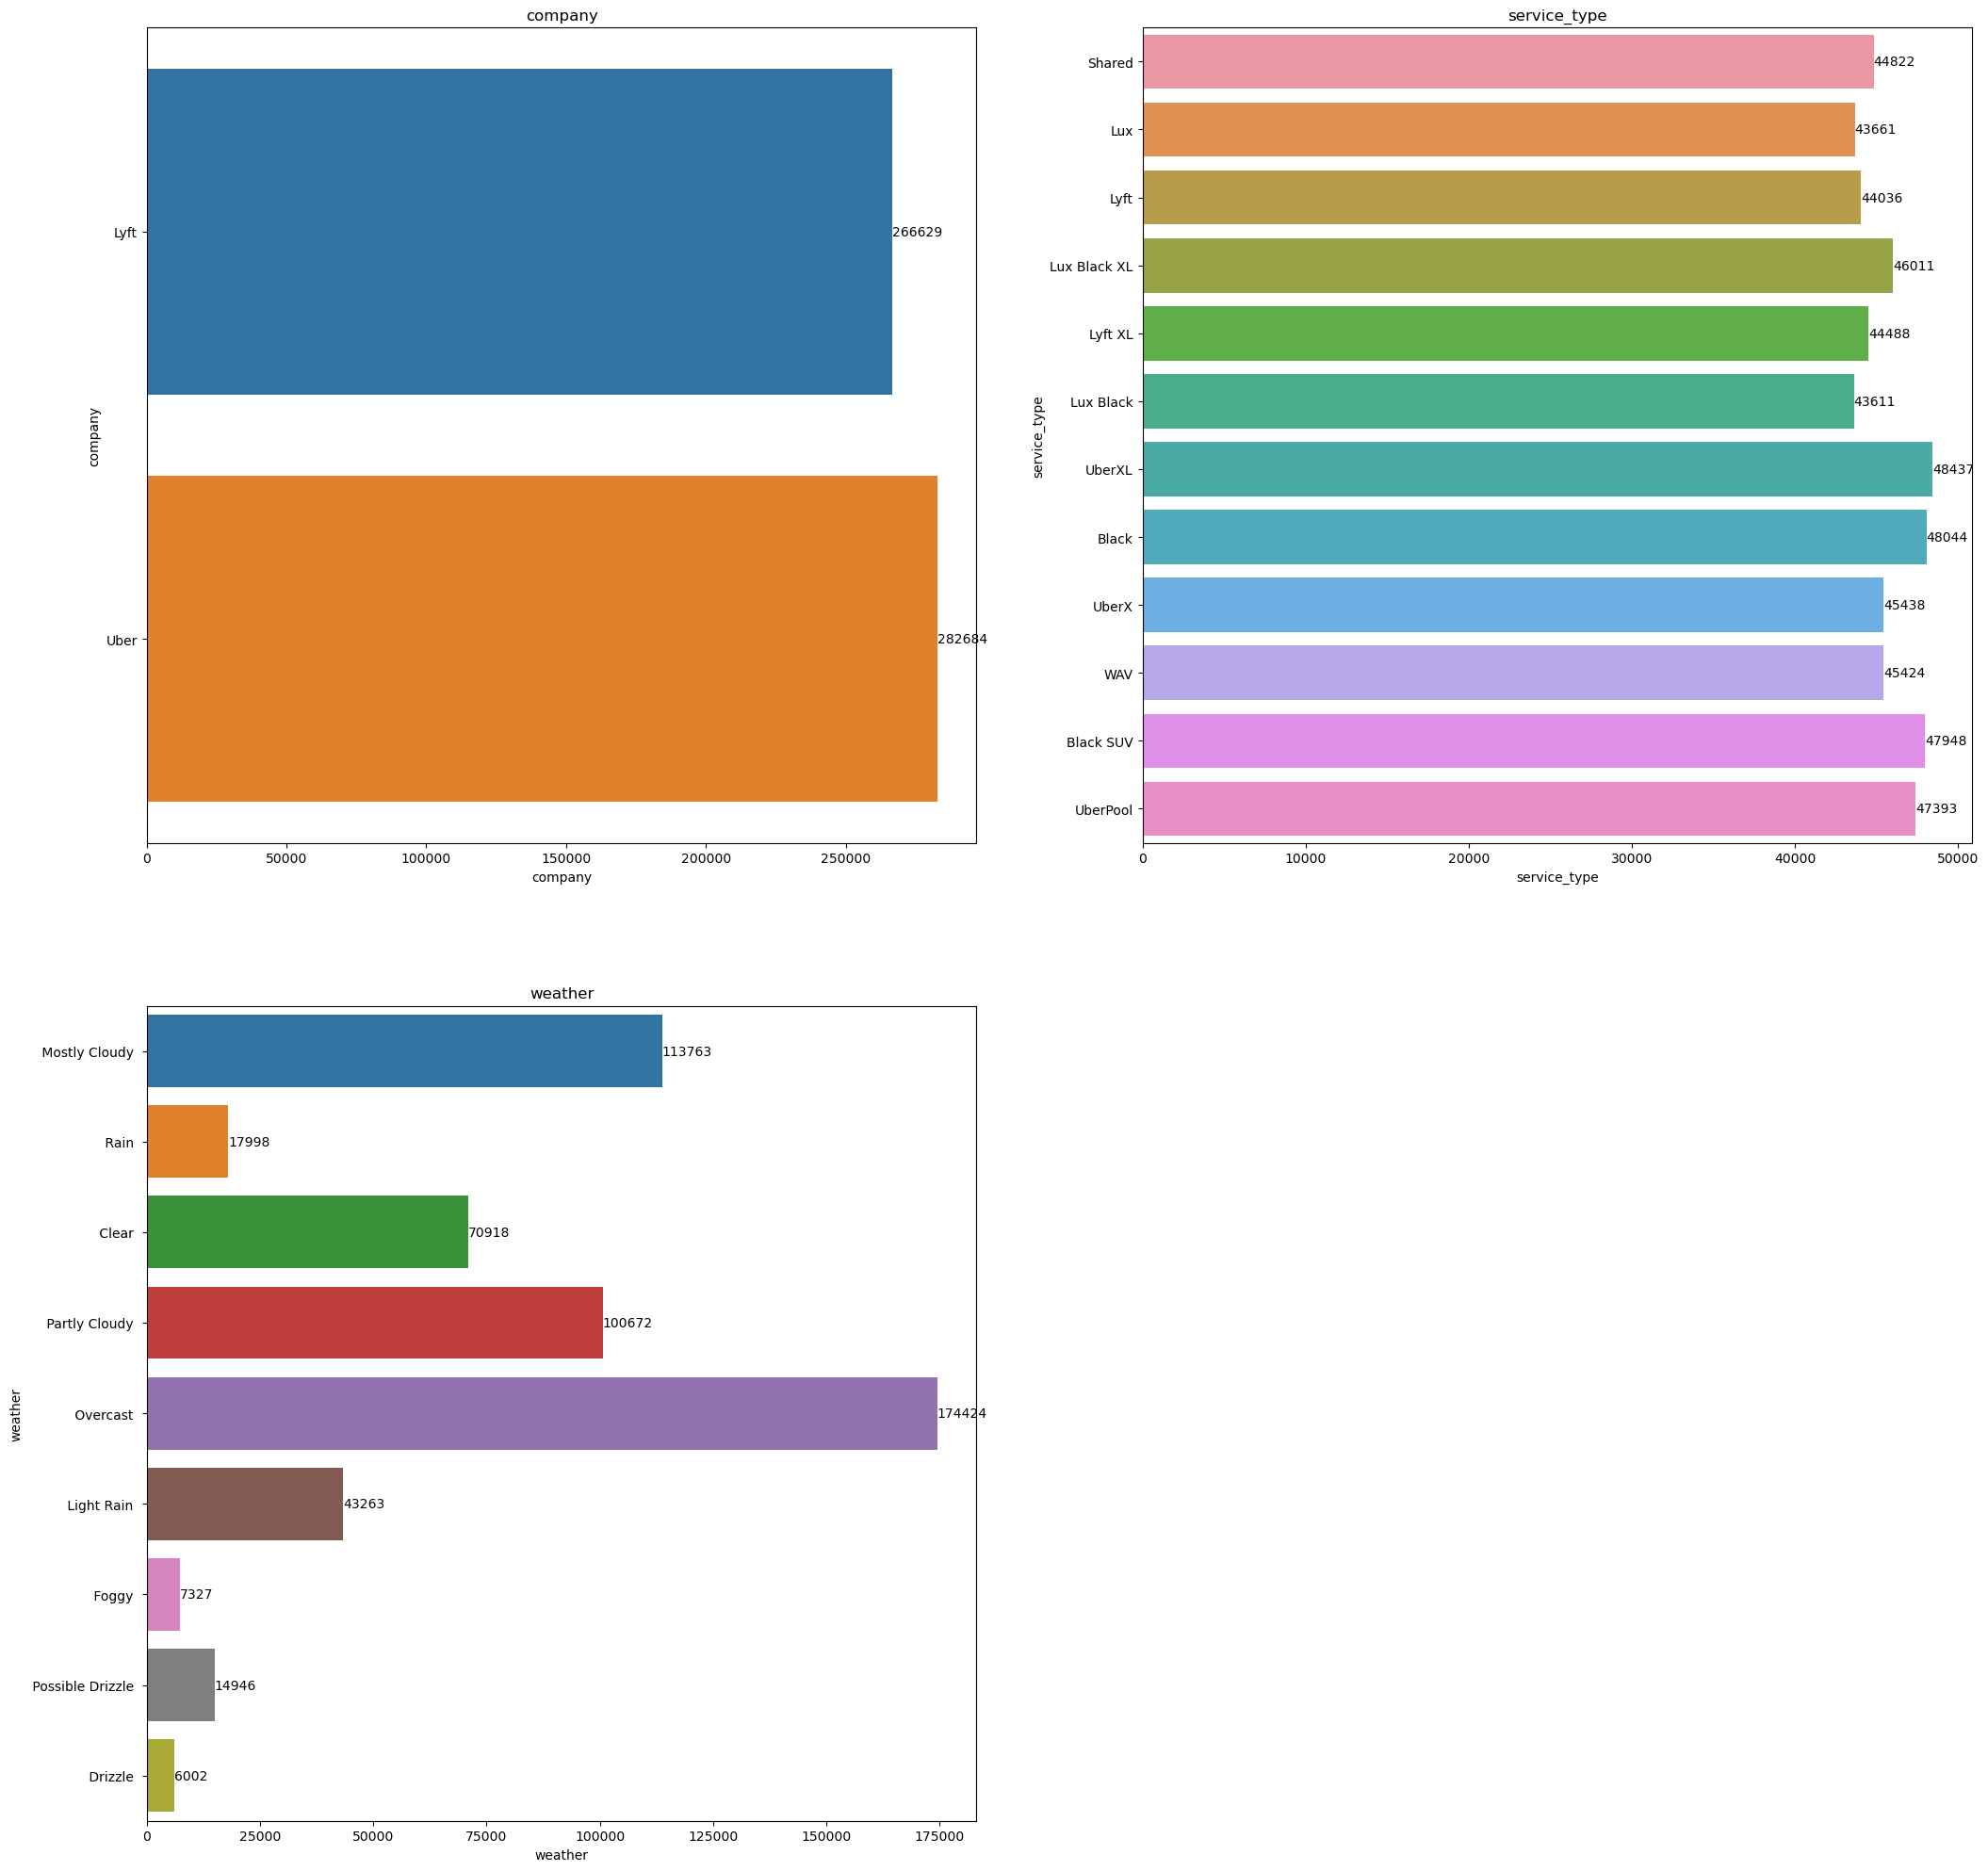

In [22]:
# visualisasi categorical features
plt.figure(figsize=(25, 200), facecolor="white")
plotnumb = 1
for cat in categorical_features:
    ax = plt.subplot(15, 2, plotnumb)
    sns.countplot(y=cat, data=df_used)
    ax.bar_label(ax.containers[0])
    plt.xlabel(cat)
    plt.title(cat)
    plotnumb += 1
plt.show()

## Numerical Features

In [23]:
numerical_features = [feature for feature in df_used.columns if (
    df_used[feature].dtypes != "O")]
print(numerical_features)
print(f"Terdapat {len(numerical_features)} Numerical Features")

['time', 'day', 'month', 'distance', 'surge_pricing', 'price']
Terdapat 6 Numerical Features


In [24]:
discrete_feature = [
    feature for feature in numerical_features if df_used[feature].nunique() < 25]
print(discrete_feature)
print(f"Terdapat {len(discrete_feature)} Discrete Numerical Features")

['time', 'day', 'month', 'surge_pricing']
Terdapat 4 Discrete Numerical Features


In [25]:
continuous_features = [
    feature for feature in numerical_features if feature not in discrete_feature]
print(continuous_features)
print(f"Terdapat {len(continuous_features)} Continuous Feature")

['distance', 'price']
Terdapat 2 Continuous Feature


Dapat diketahui dari grafik diatas bahwa :
1. Jenis perusahaan transportasi yang lebih banyak digunakan adalah Uber dengan total 282684
2. Tipe layanan transportasi yang paling banyak digunakan adalah Uber XL dengan total 48437
3. Keadaan cuaca saat pemesanan yang paling sering adalah Overcast dengan total 174424

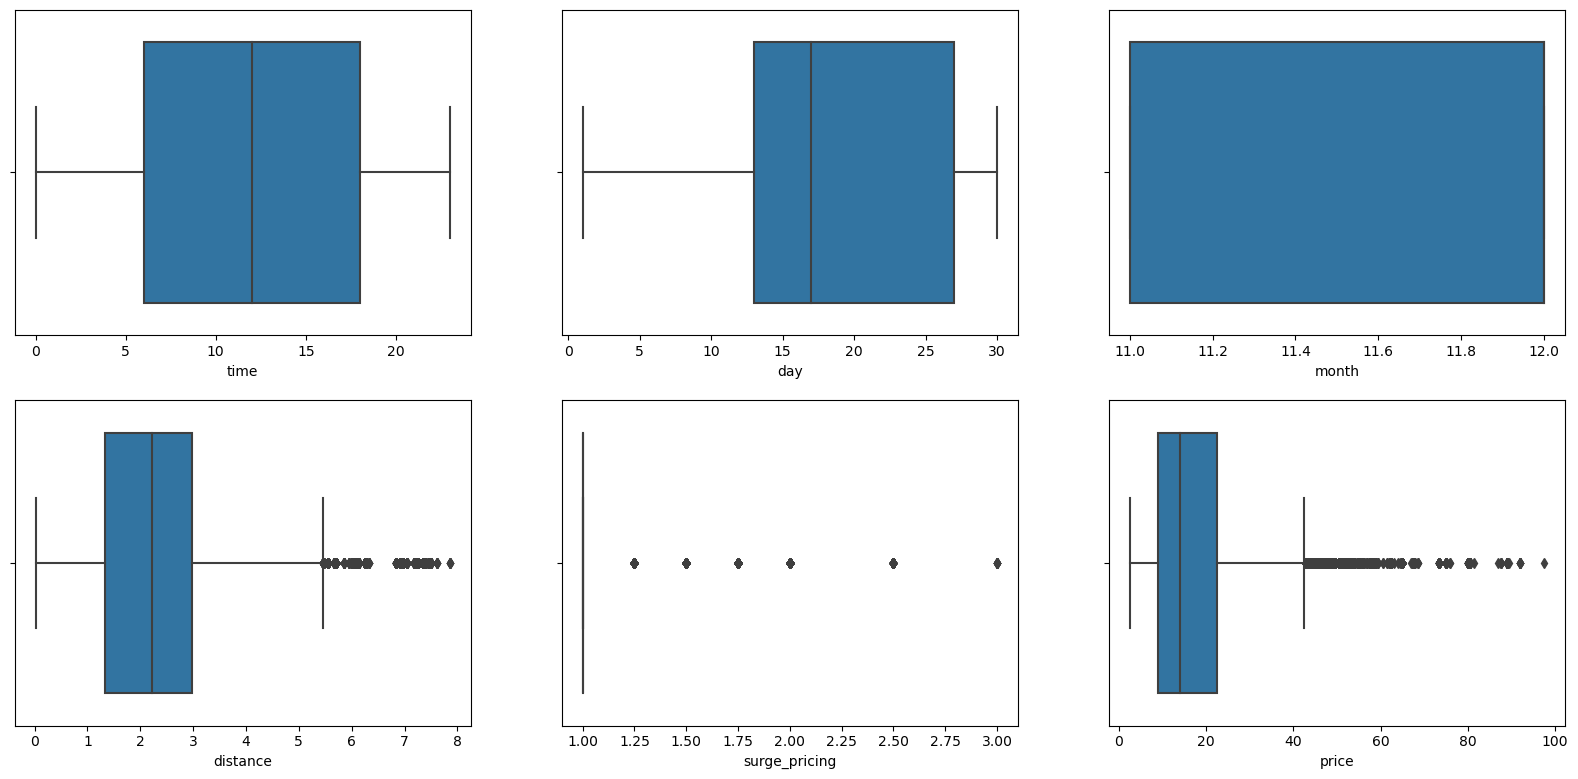

In [26]:
# visualisasi numerical features
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df_used[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

Dapat diketahui dari box plot diatas bahwa terdapat beberapa outliers dari atribut distance dan price.

**Handle Distance Outliers**

In [27]:
q1_dist = df_used['distance'].quantile(0.25)
q3_dist = df_used['distance'].quantile(0.75)
iqr_dist = q3_dist - q1_dist

batas_bawah_distance = q1_dist - 1.5*iqr_dist
batas_atas_distance = q3_dist + 1.5*iqr_dist

print("Batas bawah distance : ", batas_bawah_distance)
print("Batas atas distance: ", batas_atas_distance)

Batas bawah distance :  -1.1449999999999996
Batas atas distance:  5.455


In [28]:
print('Data sebelum di hilangkan outliernya :', df_used.shape)
df_used = df_used[~((df_used['distance'] > (q3_dist+(1.5*iqr_dist))))]
print('Data sesudah dihilangkan outliernya :', df_used.shape)

Data sebelum di hilangkan outliernya : (549313, 9)
Data sesudah dihilangkan outliernya : (543221, 9)


**Handle Price Outliers**

In [29]:
q1_price = df_used['price'].quantile(0.25)
q3_price = df_used['price'].quantile(0.75)
iqr_price = q3_price - q1_price

batas_bawah_price = q1_price - 1.5*iqr_price
batas_atas_price = q3_price + 1.5*iqr_price

print("Batas bawah price : ", batas_bawah_price)
print("Batas atas price: ", batas_atas_price)

Batas bawah price :  -11.25
Batas atas price:  42.75


In [30]:
print('Data sebelum di hilangkan outliernya :', df_used.shape)
df_used = df_used[~((df_used['price'] > (q3_price+(1.5*iqr_price))))]
print('Data sesudah dihilangkan outliernya :', df_used.shape)

Data sebelum di hilangkan outliernya : (543221, 9)
Data sesudah dihilangkan outliernya : (538565, 9)


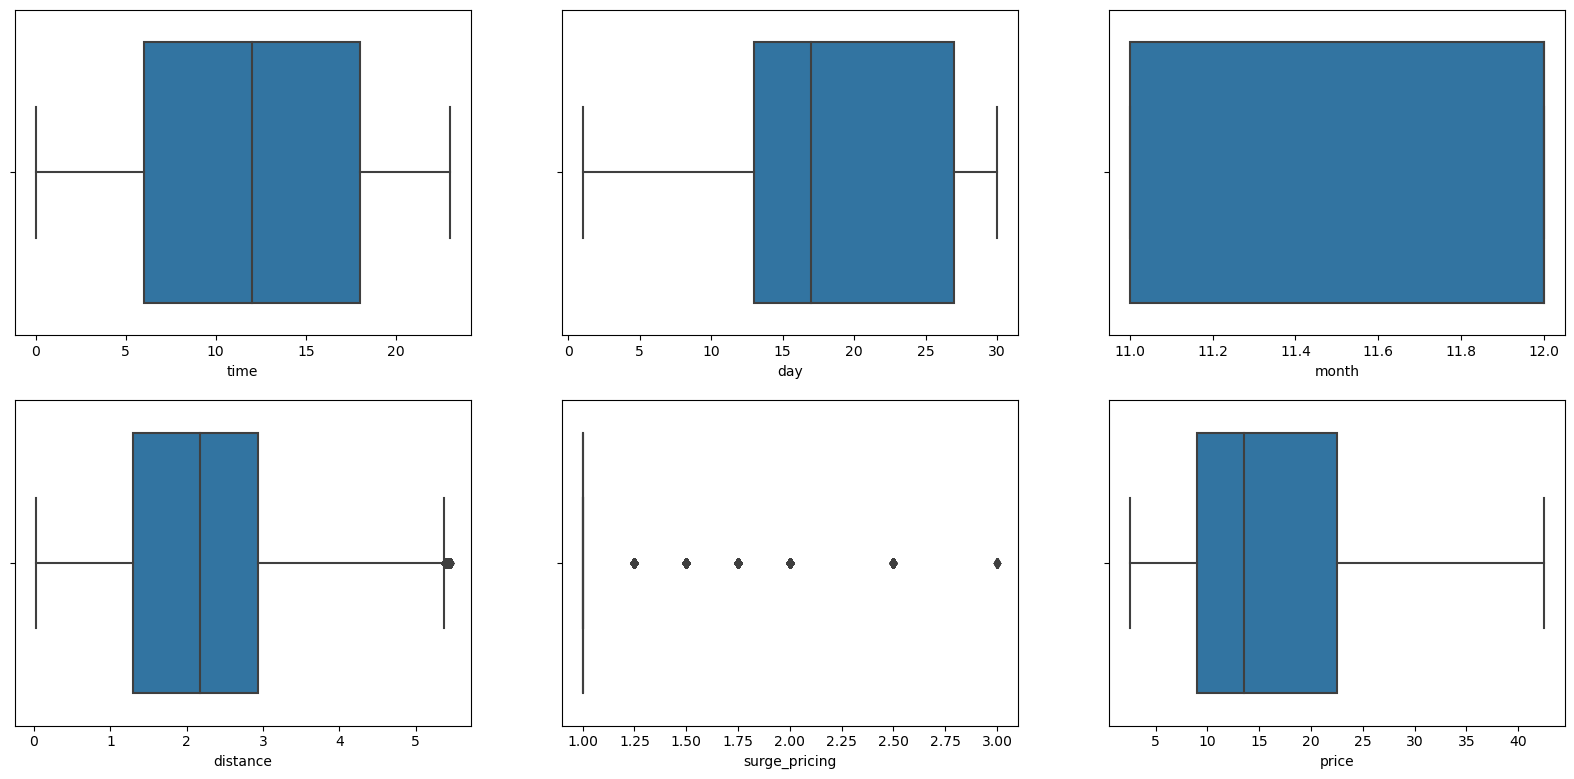

In [31]:
# visualisasi numerical features setelah menghapus data outliers
plt.figure(figsize=(20, 60), facecolor='white')
num = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, num)
    sns.boxplot(df_used[numerical_feature])
    plt.xlabel(numerical_feature)
    num += 1
plt.show()

## Korelasi Data

<AxesSubplot:>

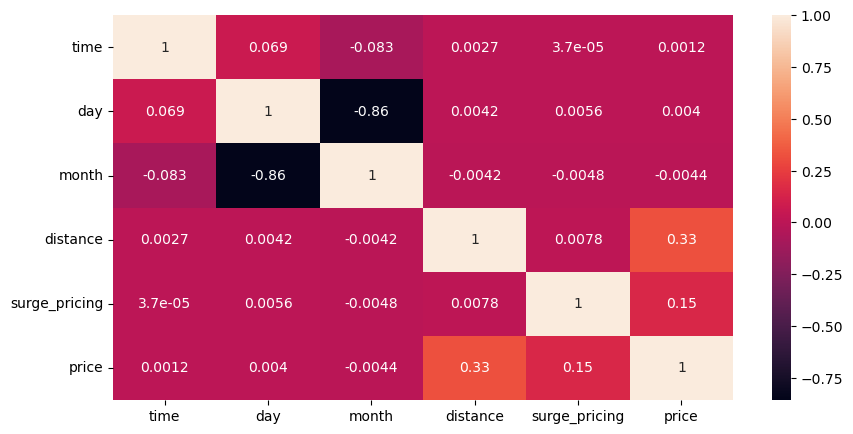

In [32]:
# cek korelasi
corr_mat = df_used.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(corr_mat, annot=True)

# Data Preprocessing

## Standardisasi

Dilakukan standardisasi pada data agar data yang akan digunakan tidak memiliki penyimpangan yang besar.

In [33]:
numerical_features_wo_price = numerical_features
numerical_features_wo_price.remove('price')

In [34]:
# melakukan standarisasi data yang memiliki tipe data int/numerical feature
scaler = StandardScaler()
df_used[numerical_features] = scaler.fit_transform(df_used[numerical_features])

In [35]:
df_used

,time,day,month,company,service_type,distance,surge_pricing,weather,price
0,-0.376632,-0.151193,0.810521,Lyft,Shared,-1.639551,-0.159053,Mostly Cloudy,5.0
1,-1.386283,0.952218,-1.233774,Lyft,Lux,-1.639551,-0.159053,Rain,11.0
2,-1.530519,1.052528,-1.233774,Lyft,Lyft,-1.639551,-0.159053,Clear,7.0
3,-1.097811,1.253148,-1.233774,Lyft,Lux Black XL,-1.639551,-0.159053,Clear,26.0
4,-1.242047,1.152838,-1.233774,Lyft,Lyft XL,-1.639551,-0.159053,Partly Cloudy,9.0
...,...,...,...,...,...,...,...,...,...
693065,1.642668,-1.655844,0.810521,Uber,WAV,-1.110970,-0.159053,Partly Cloudy,9.5
693066,1.642668,-1.655844,0.810521,Uber,UberXL,-1.110970,-0.159053,Partly Cloudy,13.0
693067,1.642668,-1.655844,0.810521,Uber,UberX,-1.110970,-0.159053,Partly Cloudy,9.5
693069,1.642668,-1.655844,0.810521,Uber,Black SUV,-1.110970,-0.159053,Partly Cloudy,27.0


## Encode

In [36]:
df_encoded = pd.get_dummies(df_used,columns=(categorical_features))
df_encoded.head()

,time,day,month,distance,surge_pricing,price,company_Lyft,company_Uber,service_type_Black,service_type_Black SUV,...,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,-0.376632,-0.151193,0.810521,-1.639551,-0.159053,5.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.386283,0.952218,-1.233774,-1.639551,-0.159053,11.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.530519,1.052528,-1.233774,-1.639551,-0.159053,7.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-1.097811,1.253148,-1.233774,-1.639551,-0.159053,26.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.242047,1.152838,-1.233774,-1.639551,-0.159053,9.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Pendefinisian Model

Setelah memperoleh data yang akan digunakan untuk pelatihan model melalui proses data cleansing dan data preprocessing. Terdapat 8 atribut yang akan digunakan untuk membuat sistem prediksi harga pada Uber dan Lyft yaitu sebagai berikut :
1. time	
2. day	
3. month		
4. company	
5. service_type	
6. distance	
7. surge_pricing	
8. weather	
9. price

Metode pengujian yang digunakan pada projek kali ini adalah metode Linear Regression. Linear Regression adalah salah satu teknik regresi yang paling penting dan banyak digunakan. Ini adalah salah satu metode Regresi yang paling sederhana. Kelebihan dari metode ini adalah kemudahan interpretasi hasil.

Sebelum melakukan pengujian data, kumpulan data yang akan digunakan terlebih dahulu dibagi menjadi dua subkumpulan data secara acak. Subkumpulan data tersebut merupakan training set dan test set. Data training set digunakan untuk melatih metode kita, kemudian data test set digunakan untuk mengevaluasi kinerja. Hal ini dilakukan untuk mengevaluasi model yang tidak bias.

Terdapat beberapa metriks dalam mengukur kinerja model Regresi, tetapi pada projek ini menggunakan metriks R-squares dan RMSE (Root-Mean-Square-Error).

## Train-Test-Split

Menentukan variabel bebas dan variabel terikat :

* x = variabel bebas = time, day, month, start, finish,	company, service_type, distance, weather 
* y = variabel terikat = price

In [37]:
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']

Membagi data menjadi training dan testing dengan training sebesar 70% dan testing sebesar 30%

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Pelatihan Model

In [39]:
linReg = LinearRegression()

In [40]:
linReg.fit(x_train, y_train)

LinearRegression()

# Evaluasi Model

In [41]:
y_predict = linReg.predict(x_test)
r_sq_test = linReg.score(x_test, y_test)

print('Coefficient of determination test:', r_sq_test)

Coefficient of determination test: 0.9339312896071167


In [42]:
linReg_mse = mean_squared_error(y_predict, y_test)
linReg_rmse = np.sqrt(linReg_mse)

print('Linear Regression MSE:', linReg_mse)
print('Linear Regression RMSE:', linReg_rmse)

Linear Regression MSE: 5.232105240111868
Linear Regression RMSE: 2.2873795575093934


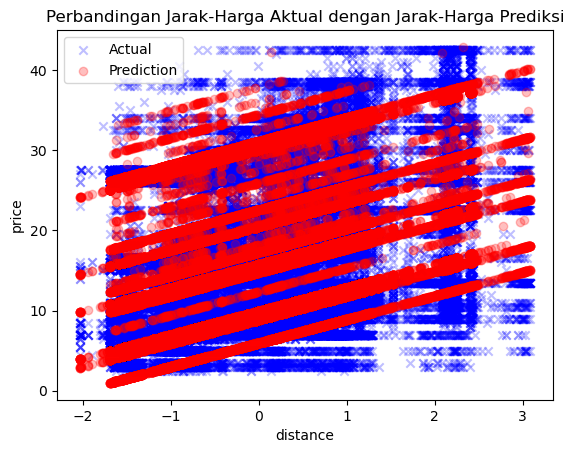

In [43]:
plt.scatter(x_test['distance'], y_test, c='b',
            alpha=0.25, marker='x', label='Actual')
plt.scatter(x_test['distance'], y_predict, c='r',
            alpha=0.25, marker='o', label='Prediction')
plt.xlabel('distance')
plt.ylabel('price')

plt.title("Perbandingan Jarak-Harga Aktual dengan Jarak-Harga Prediksi")
plt.legend(loc='best')
plt.show()

# Model Inference

In [44]:
df_encoded.columns

Index(['time', 'day', 'month', 'distance', 'surge_pricing', 'price',
       'company_Lyft', 'company_Uber', 'service_type_Black',
       'service_type_Black SUV', 'service_type_Lux', 'service_type_Lux Black',
       'service_type_Lux Black XL', 'service_type_Lyft',
       'service_type_Lyft XL', 'service_type_Shared', 'service_type_UberPool',
       'service_type_UberX', 'service_type_UberXL', 'service_type_WAV',
       'weather_ Clear ', 'weather_ Drizzle ', 'weather_ Foggy ',
       'weather_ Light Rain ', 'weather_ Mostly Cloudy ', 'weather_ Overcast ',
       'weather_ Partly Cloudy ', 'weather_ Possible Drizzle ',
       'weather_ Rain '],
      dtype='object')

In [45]:
df_new = pd.DataFrame({
    'time': [7, 10, 18, 19, 20, 13, 13], 
    'day': [1, 1, 30, 30, 30, 13, 13], 
    'month': [1, 1, 12, 12, 12, 4, 4], 
    'distance': [1.13, 1.13, 2.0, 2.0, 2.0, 3.14, 3.14], 
    'surge_pricing': [1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'company_Lyft': [1, 1, 0, 0, 0, 1, 1], 
    'company_Uber': [0, 0, 1, 1, 1, 0, 0], 
    'service_type_Black': [0, 0, 0, 0, 0, 0, 0],
    'service_type_Black SUV': [0, 0, 0, 0, 0, 0, 0], 
    'service_type_Lux': [0, 0, 0, 0, 0, 0, 0], 
    'service_type_Lux Black' : [0, 0, 0, 0, 0, 0, 0], 
    'service_type_Lux Black XL': [0, 0, 0, 0, 0, 0, 0], 
    'service_type_Lyft': [1, 1, 0, 0, 0, 0, 1],
    'service_type_Lyft XL': [0, 0, 0, 0, 0, 1, 0], 
    'service_type_Shared': [0, 0, 0, 0, 0, 0, 0], 
    'service_type_UberPool': [0, 0, 0, 0, 0, 0, 0],
    'service_type_UberX': [0, 0, 0, 0, 0, 0, 0], 
    'service_type_UberXL': [0, 0, 1, 1, 1, 0, 0], 
    'service_type_WAV': [0, 0, 0, 0, 0, 0, 0],
    'weather_ Clear ': [1, 1, 1, 0, 0, 0, 0], 
    'weather_ Drizzle ': [0, 0, 0, 0, 0, 0, 0], 
    'weather_ Foggy ': [0, 0, 0, 0, 0, 0, 0],
    'weather_ Light Rain ': [0, 0, 0, 0, 0, 0, 0], 
    'weather_ Mostly Cloudy ': [0, 0, 0, 0, 0, 0, 0], 
    'weather_ Overcast ': [0, 0, 0, 1, 0, 0, 0],
    'weather_ Partly Cloudy ': [0, 0, 0, 0, 0, 1, 1], 
    'weather_ Possible Drizzle ': [0, 0, 0, 0, 0, 0, 0],
    'weather_ Rain ': [0, 0, 0, 0, 1, 0, 0]
})

df_new

,time,day,month,distance,surge_pricing,company_Lyft,company_Uber,service_type_Black,service_type_Black SUV,service_type_Lux,...,service_type_WAV,weather_ Clear,weather_ Drizzle,weather_ Foggy,weather_ Light Rain,weather_ Mostly Cloudy,weather_ Overcast,weather_ Partly Cloudy,weather_ Possible Drizzle,weather_ Rain
0,7,1,1,1.13,1.5,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,10,1,1,1.13,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,18,30,12,2.00,1.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,19,30,12,2.00,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,30,12,2.00,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,13,13,4,3.14,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,13,13,4,3.14,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
y_predict_new = linReg.predict(df_new)
y_predict_new

array([14.3092041 , 13.70080566, 22.89221191, 22.89904785, 22.90136719,
       25.3861084 , 19.59741211])

# Pengambilan Kesimpulan

**Faktor-Faktor**
Dapat diketahui faktor-faktor yang mempengaruhi harga/tarif pada layanan Uber dan Lyft antara lain : 
1. time
2. day
3. month
4. company
5. service_type
6. distance
7. surge_pricing
8. weather 
9. price

**Akurasi**
Berdasarkan Coefficient of Determination sebesar 93.30% dengan menggunakan model Linear Regression ini dapat memprediksi harga transportasi publik (Uber dan Lyft). 

**Wawasan**
Insight yang ditemukan dalam layanan Uber dan Lyft adalah sebagai berikut :
1. Apabila keberangkatan dilakukan pada jam-jam yang padat seperti jam berangkat atau pulang kerja maka tarif layanan akan meningkat, dapat dilihat dari data 1 dan 2 dimana pada jam keberangkatan yang berbeda namun dengan layanan yang sama maka tarif layanan lebih mahal pada jam 07.00.
2. Apabila keberangkatan pada saat cuaca hujan maka tarif layanan akan meningkat, dapat dilihat dari data 3, 4, dan 5 bahwa pada saat cuaca terang dan berawan biaya layanan lebih murah daripada saat cuaca hujan.
3. Perbedaan jenis layanan yang dipilih juga memengaruhi tarif layanan, dapat dilihat pada data 6 dan 7 bahwa pada saat menggunakan Lyft XL tarif layanan lebih mahal daripada menggunakan Lyft.